In [124]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

​‌‌‍Data Preprocessing​

Training data Preprocessing

In [125]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


⁡⁢⁣⁣​‌‌‍Validation Image Preprocessing​⁡

In [126]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [127]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [128]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 46.5   65.5   37.5 ]
   [ 33.75  52.75  24.75]
   [ 33.    52.    24.  ]
   ...
   [164.75 165.75 160.75]
   [163.75 164.75 159.75]
   [163.5  164.5  159.5 ]]

  [[ 43.75  62.75  34.75]
   [ 42.75  61.75  33.75]
   [ 41.25  60.25  32.25]
   ...
   [163.25 164.25 159.25]
   [162.25 163.25 158.25]
   [161.75 162.75 157.75]]

  [[ 30.    48.    22.  ]
   [ 24.75  42.75  16.75]
   [ 22.25  40.25  14.25]
   ...
   [163.25 164.25 159.25]
   [162.25 163.25 158.25]
   [161.75 162.75 157.75]]

  ...

  [[139.   140.   134.  ]
   [137.5  138.5  132.5 ]
   [137.   138.   132.  ]
   ...
   [ 39.25  66.25  35.25]
   [ 36.    63.    32.  ]
   [ 30.5   57.5   26.5 ]]

  [[139.   140.   134.  ]
   [137.5  138.5  132.5 ]
   [137.   138.   132.  ]
   ...
   [ 32.25  59.25  28.25]
   [ 33.5   60.5   29.5 ]
   [ 32.5   59.5   28.5 ]]

  [[139.   140.   134.  ]
   [137.5  138.5  132.5 ]
   [137.   138.   132.  ]
   ...
   [ 22.5   49.5   18.5 ]
   [ 23.25  50.25  19.25]
   [ 26.5   53.5   2

⁡⁢⁣⁣​‌‌‍Building Model​⁡

In [129]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [130]:
model=Sequential()

⁡⁢⁣⁣​‌‌‍To Avoid OverShooting​⁡

⁡⁢⁢⁢​‌‍‌Choose small learning rate default 0.001 to 0.0001
Their might be the problem of underfitting so increase the number of neurons
Add more  Convolutional layer  to extract more relevant features ​⁡

In [131]:
model.add(Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', input_shape=[128, 128, 3]))  # First Conv layer
model.add(Conv2D(filters=32, strides=(1,1), kernel_size=3, activation='relu'))  # Second Conv layer
model.add(MaxPool2D(strides=2, pool_size=2))  # Max Pooling layer


In [132]:
model.add(Conv2D(filters=64,padding='same',kernel_size=3,activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,strides=(1,1),kernel_size=3,activation='relu'))
model.add(MaxPool2D(strides=2,pool_size=2))

In [133]:
model.add(Conv2D(filters=128,padding='same',kernel_size=3,activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,strides=(1,1),kernel_size=3,activation='relu'))
model.add(MaxPool2D(strides=2,pool_size=2))

In [134]:
model.add(Conv2D(filters=256,padding='same',kernel_size=3,activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,strides=(1,1),kernel_size=3,activation='relu'))
model.add(MaxPool2D(strides=2,pool_size=2))

In [135]:
model.add(Conv2D(filters=512,padding='same',kernel_size=3,activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,strides=(1,1),kernel_size=3,activation='relu'))
model.add(MaxPool2D(strides=2,pool_size=2))

In [136]:
model.add(Dropout(0.25))

⁡⁢⁣⁣​‌‌‍Flattening Layer ​⁡

In [137]:
model.add(Flatten())

​‌‌‍⁡⁢⁣⁣Adding Dense Layer⁡​

In [138]:
model.add(Dense(units=1500,activation='relu'))

In [139]:
model.add(Dropout(0.4))

⁡⁢⁣⁣​‌‌‍Output Layer​⁡

In [140]:
model.add(Dense(units=38,activation='softmax'))

⁡⁢⁣⁣​‌‌‍Compiling Model​⁡

In [141]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [142]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

⁡⁢⁣⁣​‌‌‍Model Fitting​⁡

In [144]:
training_accuracy=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 919s 417ms/step - accuracy: 0.3883 - loss: 2.1724 - val_accuracy: 0.8209 - val_loss: 0.5585
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1249s 569ms/step - accuracy: 0.8321 - loss: 0.5316 - val_accuracy: 0.9066 - val_loss: 0.2897
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 956s 435ms/step - accuracy: 0.9031 - loss: 0.2979 - val_accuracy: 0.9167 - val_loss: 0.2562
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 330s 150ms/step - accuracy: 0.9322 - loss: 0.2067 - val_accuracy: 0.9341 - val_loss: 0.2090
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 350s 159ms/step - accuracy: 0.9495 - loss: 0.1543 - val_accuracy: 0.9509 - val_loss: 0.1526
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 336s 153ms/step - accuracy: 0.9634 - loss: 0.1106 - val_accuracy: 0.9546 - val_loss: 0.1469
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 352s 160ms/step - accuracy: 0.9709 - loss: 0.0850 - val_accuracy: 0.9529 - val_loss: 0.1661
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 374s 170ms/step - a

⁡⁢⁣⁣​‌‌‍Model Eval⁡⁢⁣⁣​‌‌‍uation​⁡

In [145]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 67s 30ms/step - accuracy: 0.9904 - loss: 0.0303


In [146]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.9652 - loss: 0.1122


⁡⁢⁣⁣‌Saving Model -> because you can not every time train the model on such a large dataset so to use this model in future we are saving it
​⁡

In [149]:
model.save("trained_model.h5") # ---> take more memory but does the work​⁡

In [148]:
model.save("trained_model.keras") #---> More memory efficient than h5

⁡⁢⁣⁣​‌‌‍Now Printing our Training_accuracy History​⁡

In [ ]:
training_accuracy.history #->>> prints all the history of each epoch in the form of dictionary and It contains 4 keys loss , train_acc, val_loss, val_acc

⁡⁢⁣⁣​‌‌‍Recording History in Json Format for Future use ​⁡

In [151]:
import json
with open("training_history.json","w") as f:
    json.dump(training_accuracy.history,f)

⁡⁢⁣⁣​‌‌‍Accuracy Visulization​⁡

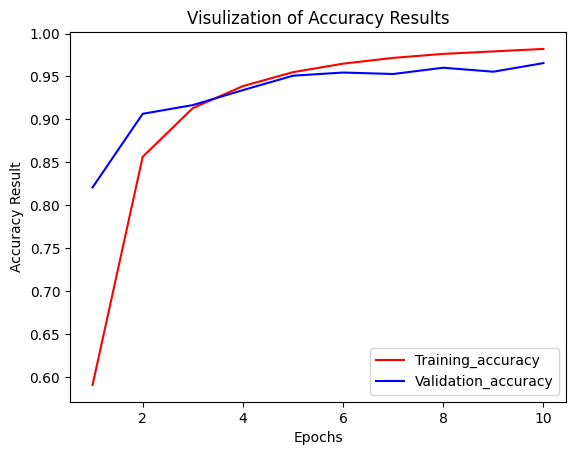

In [159]:
epoch=[i for i in range(1,11)]
plt.plot(epoch,training_accuracy.history["accuracy"],color="red",label="Training_accuracy")
plt.plot(epoch,training_accuracy.history["val_accuracy"],color="blue",label="Validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visulization of Accuracy Results")
plt.legend()

⁡⁢⁣⁣​‌‌‍Some other metrices for Model Evaluation​⁡

In [211]:
class_name=training_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [183]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [184]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step


(array([[1.0000000e+00, 7.5331057e-09, 1.8016748e-11, ..., 1.8933119e-17,
         1.1259558e-17, 4.2718112e-15],
        [9.9933666e-01, 8.6980588e-05, 2.9044656e-07, ..., 1.4777835e-11,
         1.4983320e-11, 2.0343802e-09],
        [1.0000000e+00, 8.9068199e-15, 1.1080869e-14, ..., 4.2148689e-21,
         1.5970347e-20, 1.3343839e-18],
        ...,
        [1.0946464e-11, 2.2128158e-15, 4.2794647e-13, ..., 1.8953706e-14,
         1.0401687e-15, 1.0000000e+00],
        [6.4141886e-12, 1.1086281e-14, 8.8952668e-13, ..., 1.3847461e-13,
         1.0141763e-14, 1.0000000e+00],
        [1.9131330e-16, 6.0322094e-19, 3.2213412e-19, ..., 3.2974295e-20,
         2.1099181e-18, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [185]:
predicted_category=tf.argmax(y_pred,axis=1)
predicted_category

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [186]:
true_category=tf.concat([y for x,y in test_set],axis=0)
true_category # it  will be printed in one hot encoded format like 0100000000000000000000000000000 this means it belong to class 2 

2024-09-08 12:42:47.925617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [188]:
Y_true=tf.argmax(true_category,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

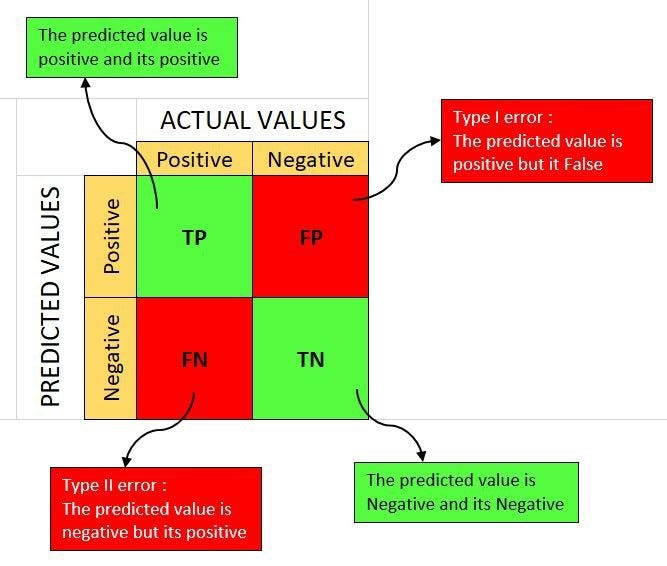

In [192]:
from sklearn.metrics import classification_report,confusion_matrix

In [191]:
print(classification_report(Y_true,predicted_category,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.95      0.95       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.93      0.99      0.96       440
                                   Apple___healthy       0.95      0.99      0.97       502
                               Blueberry___healthy       0.96      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.97      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.86      0.99      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.88      0.

⁡⁢⁣⁣​‌‌‍Making Confusion Matrix​⁡

In [195]:
cm=confusion_matrix(Y_true,predicted_category)
cm,cm.shape

(array([[480,   2,   1, ...,   0,   0,   0],
        [  0, 487,   1, ...,   0,   0,   0],
        [  0,   0, 436, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 490,   0,   0],
        [  0,   0,   0, ...,   0, 444,   0],
        [  0,   0,   1, ...,   0,   0, 478]]),
 (38, 38))

⁡⁢⁣⁣​‌‌‍Visulization of Confusion Matrix​⁡

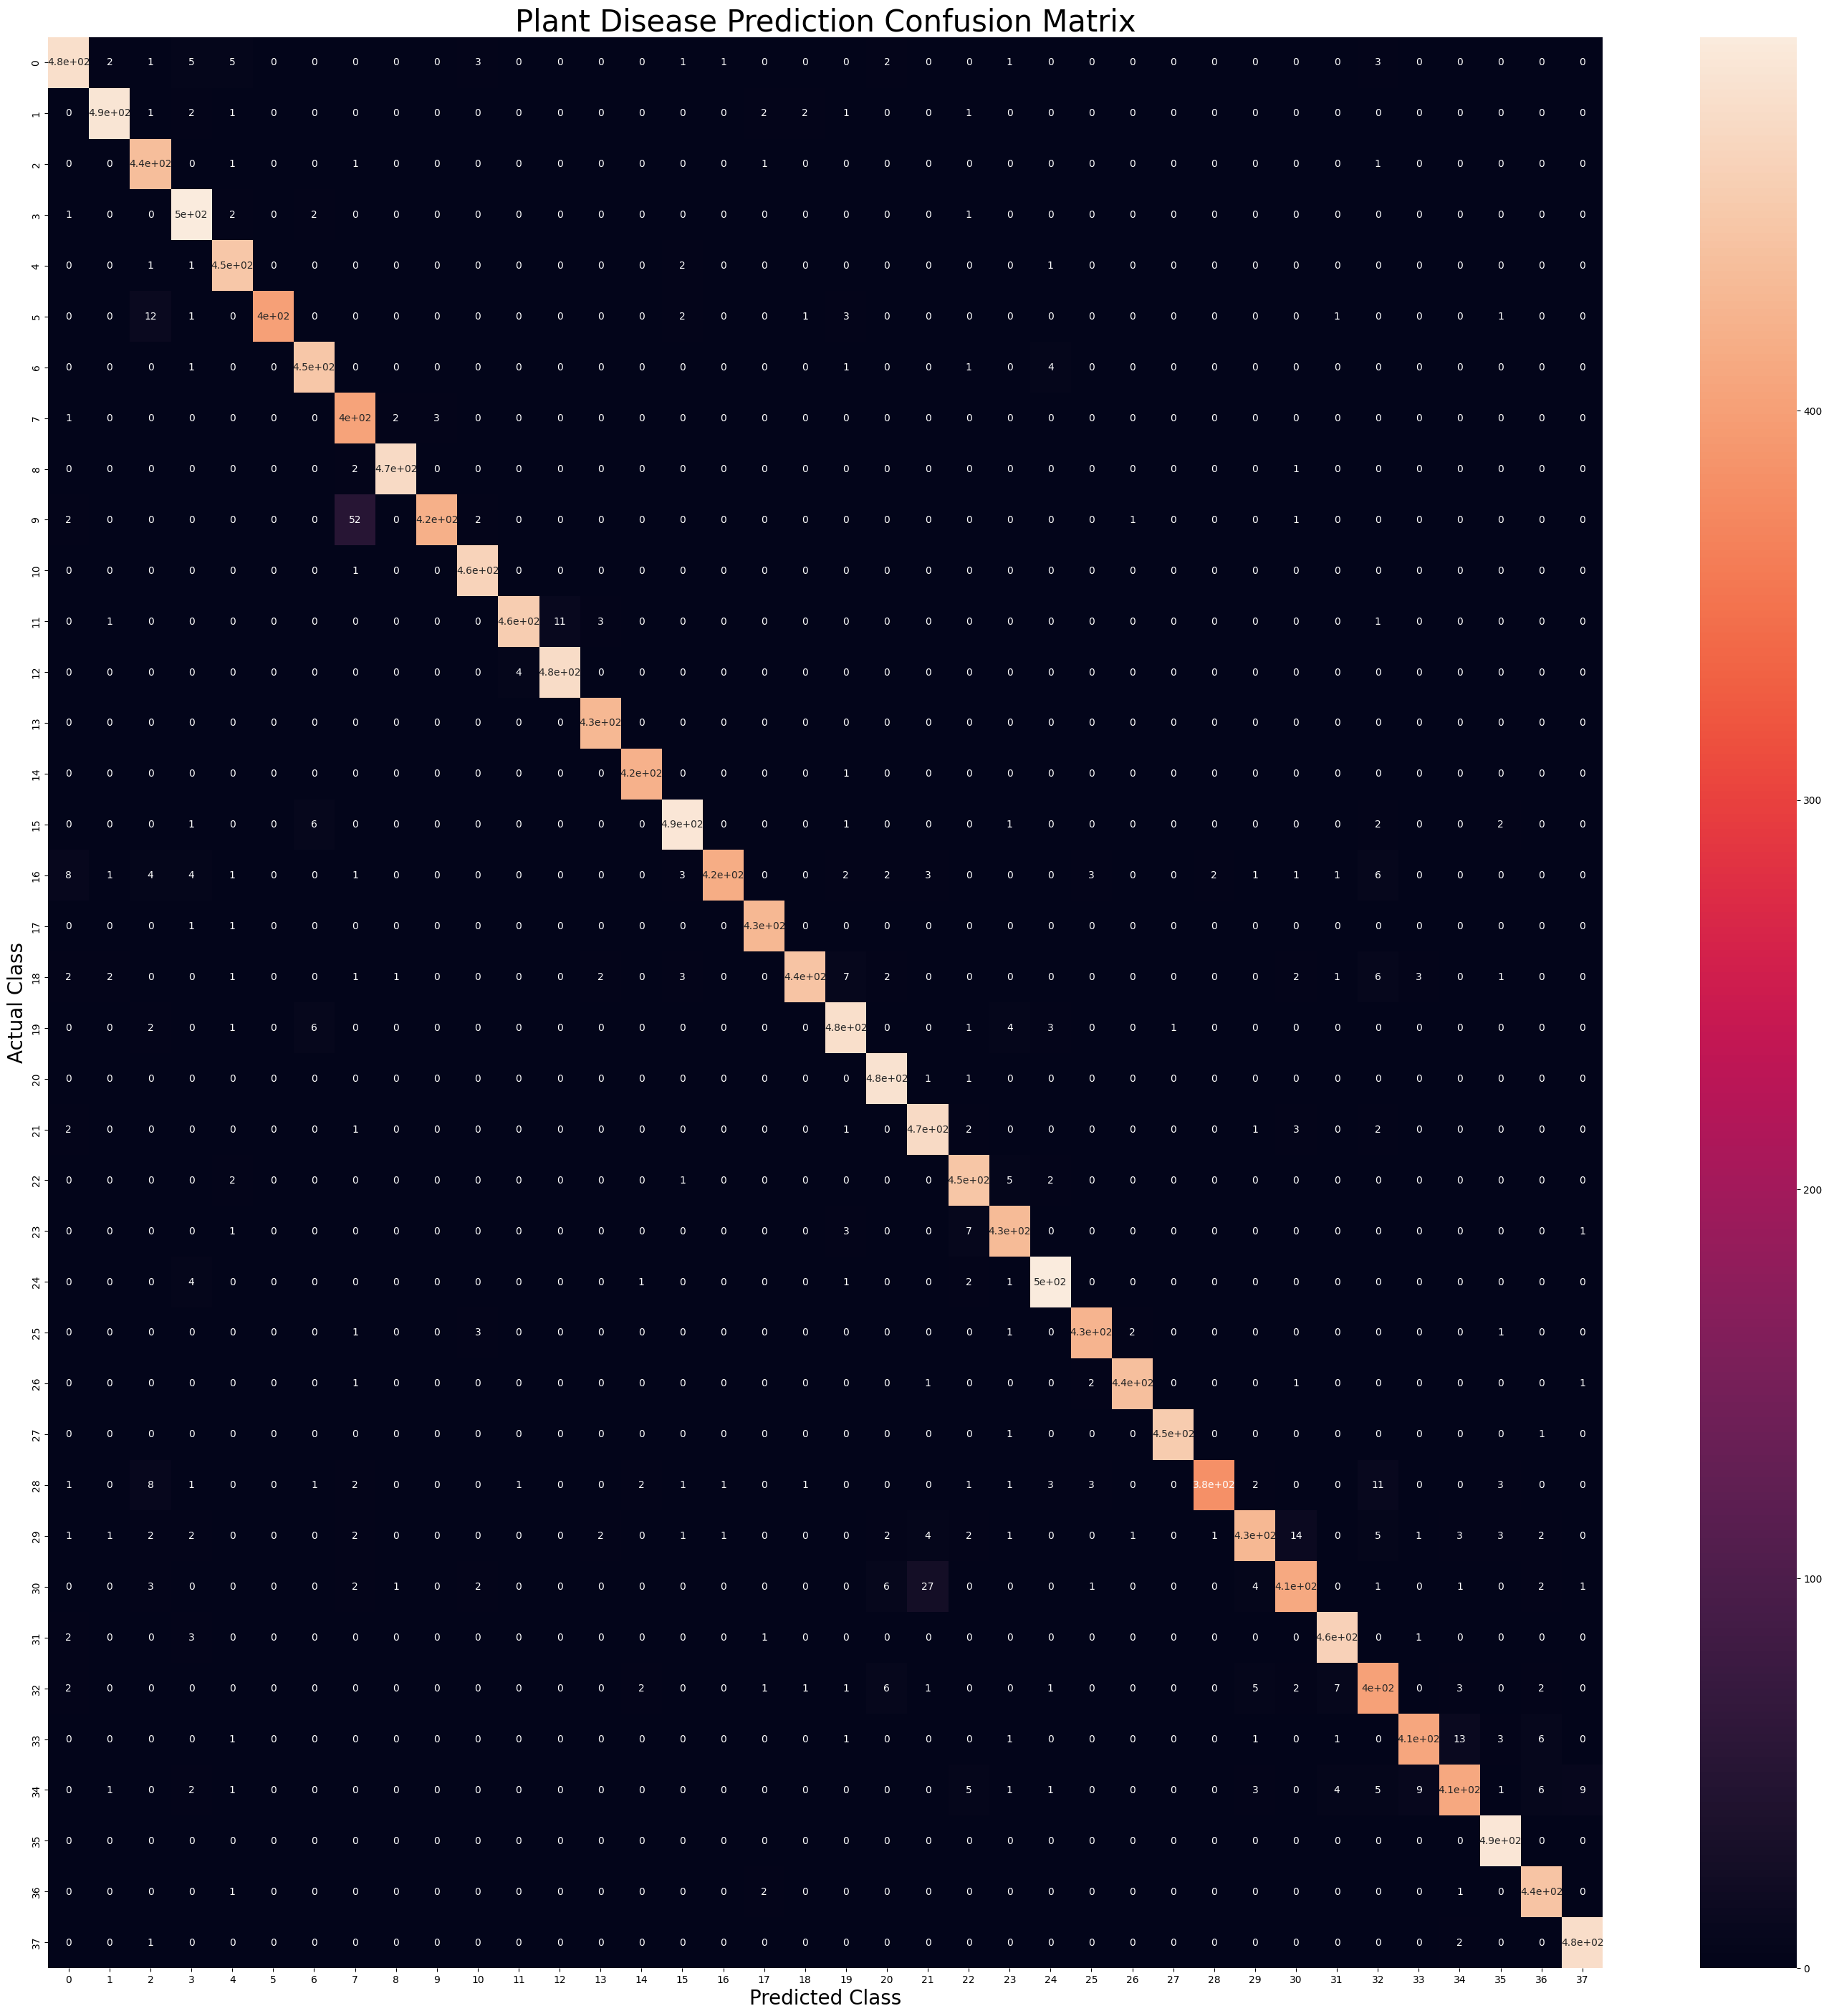

In [212]:
plt.figure(figsize=(35,35))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=30)
plt.show()